<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
print('удачного дня вам :)')

удачного дня вам :)


Надеюсь мой код будет понятен. Для связи можете написать мне в тг: https://t.me/golden_66_1 или вк: https://vk.com/golovko_denis

Для начала загружаем датасет и смотрим на него

In [10]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [11]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [12]:
data.shape

(5282, 20)

In [13]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Nan-ов нет

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Если есть пропуски, убираем их (они не были учтены в Nan-ах, так как являются пустыми строками)

In [14]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [15]:
data = data.replace(' ', np.nan)
data = data.dropna()
data['TotalSpent'] = data['TotalSpent'].astype(np.float16) #числовая фича имела тип object, меняем

Распределение числовых фичей:

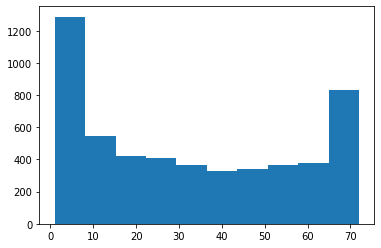

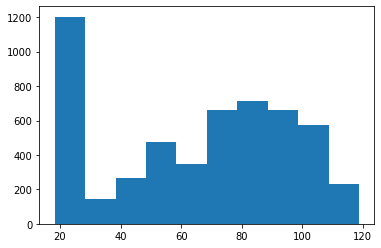

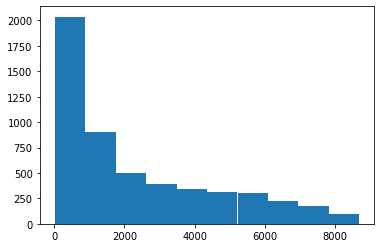

In [16]:
plt.hist(data['ClientPeriod'])
plt.show()
plt.hist(data['MonthlySpending'])
plt.show()
plt.hist(data['TotalSpent'])
plt.show()

Распределение всех фичей:

ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
49     45
57     39
39     35
44     34
36     34
Name: ClientPeriod, Length: 72, dtype: int64


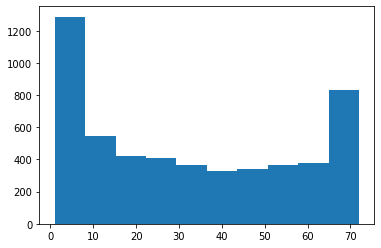

MonthlySpending
20.05    46
19.65    35
19.95    34
20.00    32
19.80    32
         ..
65.05     1
73.25     1
95.55     1
98.45     1
98.20     1
Name: MonthlySpending, Length: 1466, dtype: int64


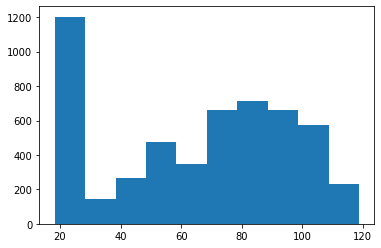

TotalSpent
20.203125      9
19.750000      8
69.625000      7
4916.000000    7
70.125000      6
              ..
1215.000000    1
239.750000     1
55.000000      1
235.125000     1
55.062500      1
Name: TotalSpent, Length: 3551, dtype: int64


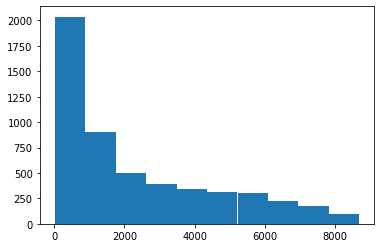

Sex
Male      2651
Female    2622
Name: Sex, dtype: int64


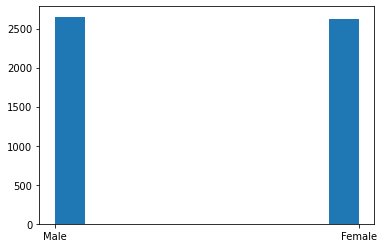

IsSeniorCitizen
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64


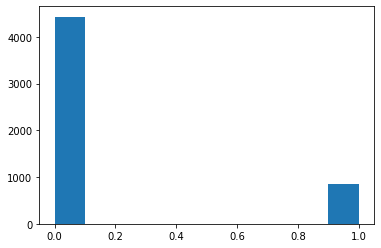

HasPartner
No     2704
Yes    2569
Name: HasPartner, dtype: int64


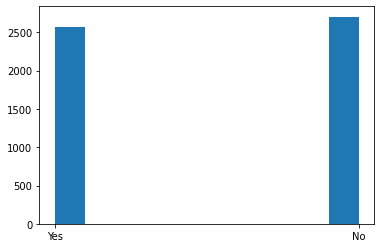

HasChild
No     3676
Yes    1597
Name: HasChild, dtype: int64


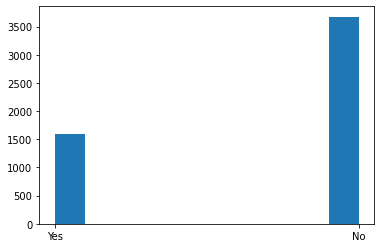

HasPhoneService
Yes    4754
No      519
Name: HasPhoneService, dtype: int64


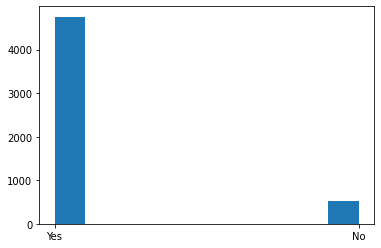

HasMultiplePhoneNumbers
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64


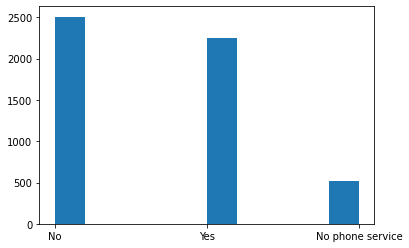

HasInternetService
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64


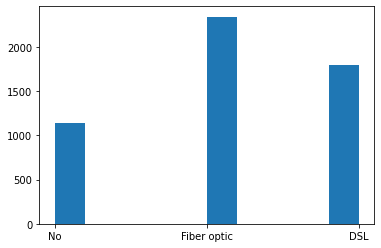

HasOnlineSecurityService
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64


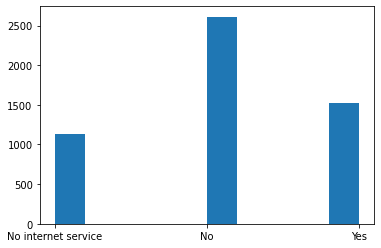

HasOnlineBackup
No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64


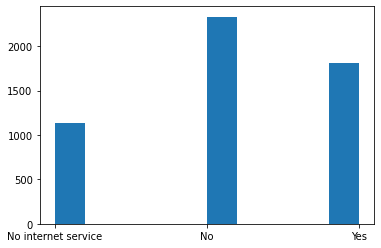

HasDeviceProtection
No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64


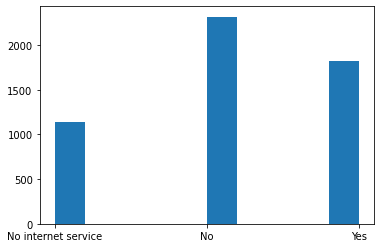

HasTechSupportAccess
No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: int64


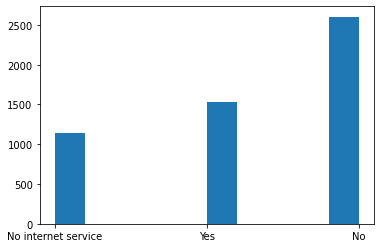

HasOnlineTV
No                     2098
Yes                    2038
No internet service    1137
Name: HasOnlineTV, dtype: int64


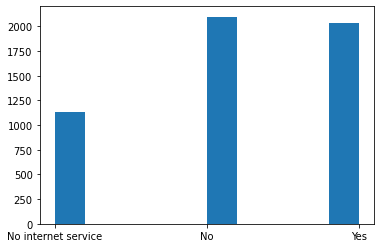

HasMovieSubscription
No                     2077
Yes                    2059
No internet service    1137
Name: HasMovieSubscription, dtype: int64


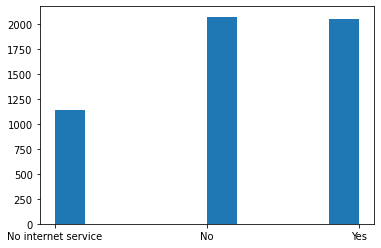

HasContractPhone
Month-to-month    2920
Two year          1272
One year          1081
Name: HasContractPhone, dtype: int64


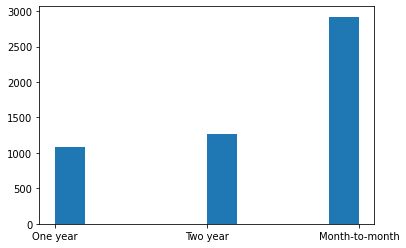

IsBillingPaperless
Yes    3145
No     2128
Name: IsBillingPaperless, dtype: int64


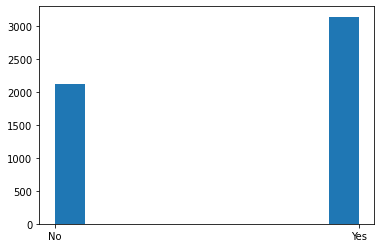

PaymentMethod
Electronic check             1786
Mailed check                 1188
Bank transfer (automatic)    1157
Credit card (automatic)      1142
Name: PaymentMethod, dtype: int64


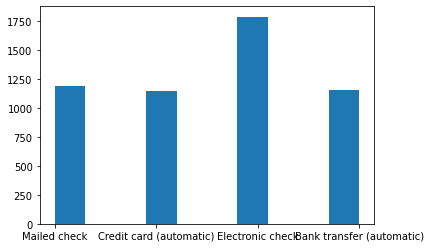

Churn
0    3889
1    1384
Name: Churn, dtype: int64


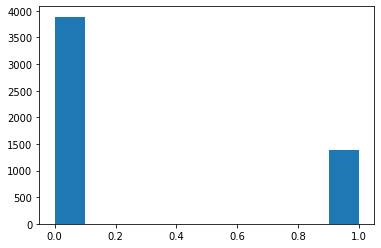

In [17]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    plt.hist(data[col])
    plt.show()

Классы сбалансированы. 

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

one-hot-encoding:

In [19]:
data = pd.get_dummies(data, columns=cat_cols)

In [20]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

нормируем и разделяем на выборки:

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(data[num_cols + cat_cols])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2, 
                                                    random_state=42)

пробуем логистическую регрессию:

In [23]:
clf = LogisticRegression()
param_grid = {'C': [100, 10, 1, 0.1, 0.001]}
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')
search.fit(X_train, y_train)
print(search.best_params_)
print(roc_auc_score(y_test, search.best_estimator_.predict(X_test)))

{'C': 10}
0.7132224581269168


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

{'C': 10} | 0.7132224581269168

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [24]:
#!pip install xgboost
import xgboost

градиентный бустинг делаю без помощи Яндекса, фичи уже отнормированы. гиперпараметры разные подбирал, остановился на такой кросс-валидации с хорошим результатом.

In [25]:
boosting_model = xgboost.XGBClassifier()

param_grid = {'n_estimators': [100, 70, 56, 52, 51, 45]}
boosting_model = GridSearchCV(boosting_model, param_grid, n_jobs=-1, cv=6, refit=True,
                              scoring='accuracy')

boosting_model.fit(X_train, y_train)

print(boosting_model.best_params_)
print(roc_auc_score(y_test, boosting_model.best_estimator_.predict_proba(X_test)[:, 1]))

{'n_estimators': 52}
0.8470346779900919


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

{'n_estimators': 52} | 0.8470346779900919

# Предсказания

In [26]:
best_model = boosting_model.best_estimator_

In [27]:
data = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

снова проделываем те же фокусы с этим датасетом.

In [28]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [29]:
data = data.replace(' ', np.nan)
#data = data.dropna()
data['TotalSpent'] = data['TotalSpent'].astype(np.float16)

выше если раскомментить data.dropna(), получится несостыковка по размерам, поэтому оставим так

In [30]:
data = pd.get_dummies(data, columns=cat_cols)

cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

X_test = scaler.fit_transform(data[num_cols + cat_cols])

In [33]:
submission['Churn'] = best_model.predict_proba(X_test)[:,1] #best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

итог: 0.85142


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.